<a href="https://colab.research.google.com/github/PiKaChu-wcg/pytorch/blob/main/myw2v.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

# 数值运算和绘图的程序包
import numpy as np
import matplotlib.pyplot as plt
import matplotlib


# 加载机器学习的软件包
from sklearn.decomposition import PCA

#加载Word2Vec的软件包
import gensim as gensim
from gensim.models import Word2Vec
from gensim.models.keyedvectors import KeyedVectors
from gensim.models.word2vec import LineSentence

#加载‘结巴’中文分词软件包

import jieba

#加载正则表达式处理的包
import re

In [3]:
f=open('三体.txt','r')
lines=[]
for line in f:
    temp=jieba.lcut(line)
    words=[]
    for i in temp:
        i=re.sub("[\s+\.\!\/_,$%^*(+\"\'””《》]+|[+——！，。？、~@#￥%……&*（）：；‘]+",'',i)
        if len(i):
            words.append(i)
    if len(words):
        lines.append(words)

Building prefix dict from the default dictionary ...
Dumping model to file cache /tmp/jieba.cache
Loading model cost 1.008 seconds.
Prefix dict has been built successfully.


In [4]:
model=Word2Vec(lines,size=20,window=2,min_count=0)

In [5]:
model.wv.most_similar('智子',topn=20)

[('被', 0.9997247457504272),
 ('出现', 0.9997025728225708),
 ('时', 0.9996549487113953),
 ('其', 0.999626874923706),
 ('于', 0.999626636505127),
 ('她', 0.9996262788772583),
 ('仿佛', 0.9996191263198853),
 ('开始', 0.9996172785758972),
 ('它', 0.9996045827865601),
 ('他们', 0.9995999336242676),
 ('一种', 0.999587893486023),
 ('吗', 0.9995816946029663),
 ('看到', 0.9995797872543335),
 ('的', 0.9995778799057007),
 ('这个', 0.999571681022644),
 ('他', 0.9995709657669067),
 ('正在', 0.9995620250701904),
 ('内', 0.9995593428611755),
 ('就是', 0.9995585083961487),
 ('你们', 0.9995580911636353)]

In [6]:
rawWordVec = []
word2ind = {}
for i, w in enumerate(model.wv.vocab):
    rawWordVec.append(model[w])
    word2ind[w] = i
rawWordVec = np.array(rawWordVec)
X_reduced = PCA(n_components=2).fit_transform(rawWordVec)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  after removing the cwd from sys.path.


/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 26234 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 23376 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 26234 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 23376 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 22320 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 29699 missing from current font.
  font.set_text

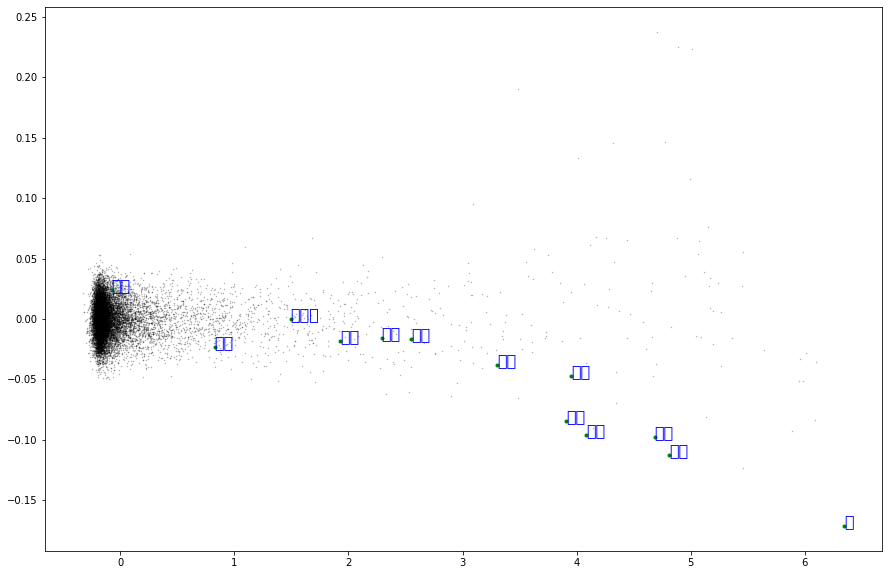

In [9]:
fig = plt.figure(figsize = (15, 10))
ax = fig.gca()
ax.set_facecolor('white')
ax.plot(X_reduced[:, 0], X_reduced[:, 1], '.', markersize = 1, alpha = 0.3, color = 'black')


# 绘制几个特殊单词的向量
words = ['智子', '地球', '三体', '质子', '科学', '世界', '文明', '太空', '加速器', '平面', '宇宙', '进展','的']

# 设置中文字体，否则无法在图形上显示中文
zhfont1 = matplotlib.font_manager.FontProperties( size=16)
for w in words:
    if w in word2ind:
        ind = word2ind[w]
        xy = X_reduced[ind]
        plt.plot(xy[0], xy[1], '.', alpha =1, color = 'green')
        plt.text(xy[0], xy[1], w, fontproperties = zhfont1, alpha = 1, color = 'blue')